# Kernels and Performance: A Practical View

We already know linear regression, decision trees, and KNN.


This notebook explores ***kernels*** and ***Support Vector Machines*** or *SVMs*, through performance comparisons across different datasets.

We learn about how SVM's work at a basic level and will see where kernels shine, where KNN works well, and how scaling + dimensionality matter.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles, make_moons, fetch_openml, fetch_20newsgroups
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix
)
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.colors import ListedColormap


# Toy datasets: Circles & Moons

We start with low-dimensional synthetic data. These are useful to visualize:

* Trees struggle with smooth curved boundaries.

* KNN often does surprisingly well.

👉 Try different `factor` and `noise` to see how the problem changes.

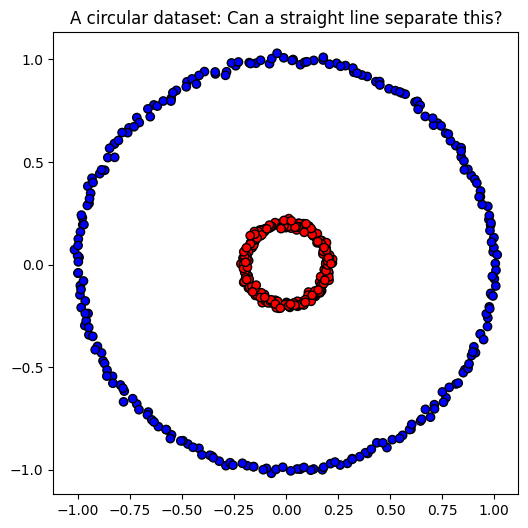

In [ ]:
# Create circular dataset
X, y = make_circles(n_samples=500, factor=0.2, noise=0.01, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("A circular dataset: Can a straight line separate this?")
plt.show()

We like to draw decision boundaries to understand and compare methods better

In [ ]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]), alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr",s=0.1)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Let us see how KNN and Decision Trees work on this

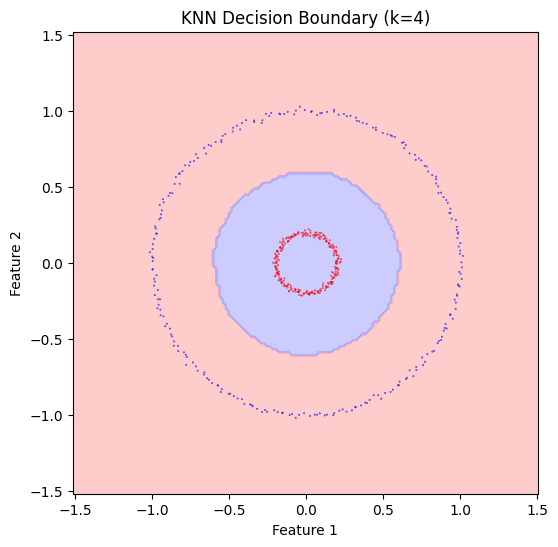

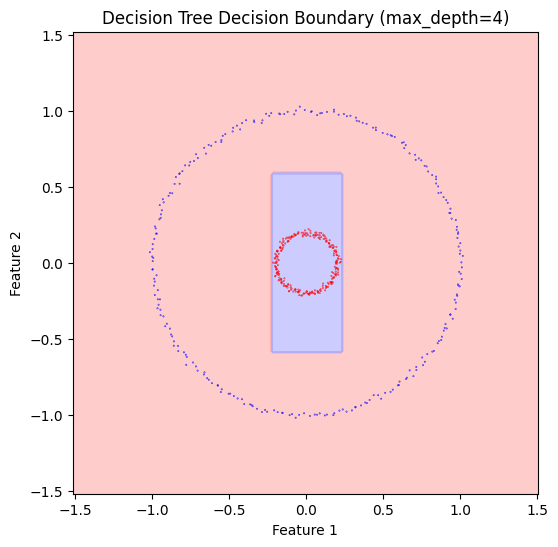

In [ ]:
# Train KNN
n_neighbors=4
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)
plot_decision_boundary(knn, X, y, f"KNN Decision Boundary (k={n_neighbors})")

# Train Decision Tree
max_depth= 4
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
tree.fit(X, y)
plot_decision_boundary(tree, X, y, f"Decision Tree Decision Boundary (max_depth={max_depth})")

Which one is better?
What happens if we make the data noisier and bring the two circles close to each other?
Now play with `factor` and `noise` in the dataset generation code, and make a dataset that is hard to train.
Play with the number of neighbors and max depth to see if you can get a good fit.

```
X, y = make_circles(n_samples=500, factor=0.2, noise=0.01, random_state=42)
```

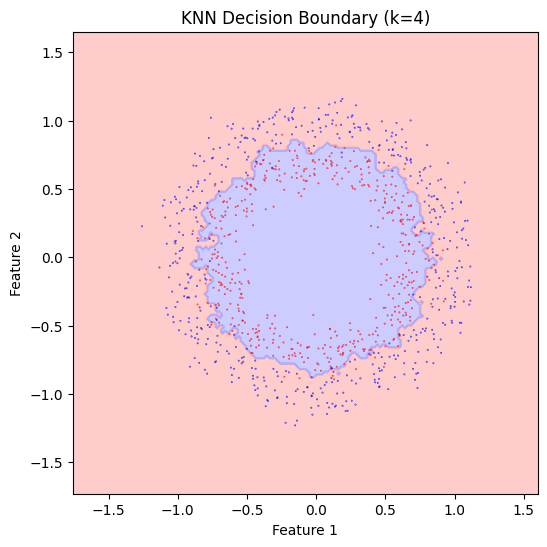

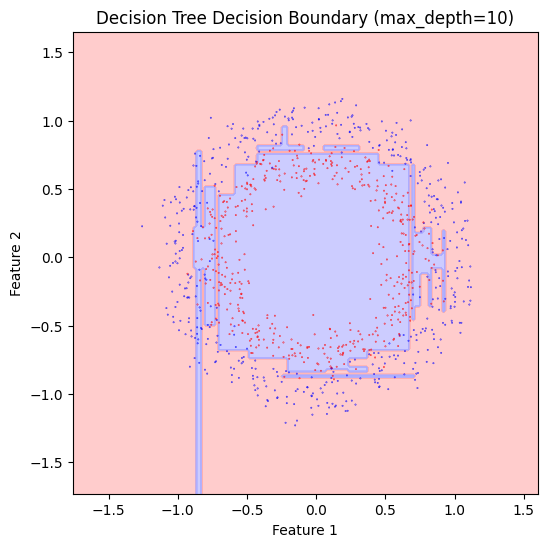

In [ ]:
X, y = make_circles(n_samples=1000, factor=0.7, noise=0.1, random_state=42)


# Train KNN
n_neighbors=4
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)
plot_decision_boundary(knn, X, y, f"KNN Decision Boundary (k={n_neighbors})")

# Train Decision Tree
max_depth= 10
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
tree.fit(X, y)
plot_decision_boundary(tree, X, y, f"Decision Tree Decision Boundary (max_depth={max_depth})")

Today we learn about Kernels and SVMs but first let us just try them out!

# Explaining the Parameters

**C (Regularization / Complexity)**

Think of `C` as how much the SVM cares about correctly classifying all training points.

Large `C` → try hard to classify everything correctly → complex, wiggly boundary → risk of overfitting.

Small `C` → allow some mistakes → smoother boundary → more generalization.

`gamma` (RBF kernel spread)

Determines how far the influence of a single point reaches.

Large `gamma` → only very close points count → boundary can be very jagged.

Small `gamma` → each point influences a wider area → smoother boundary.

`gamma`='scale'

Auto-computed as 1 / (number of features × variance of features).

Ensures the scale of your data is considered — scaling features is still important.

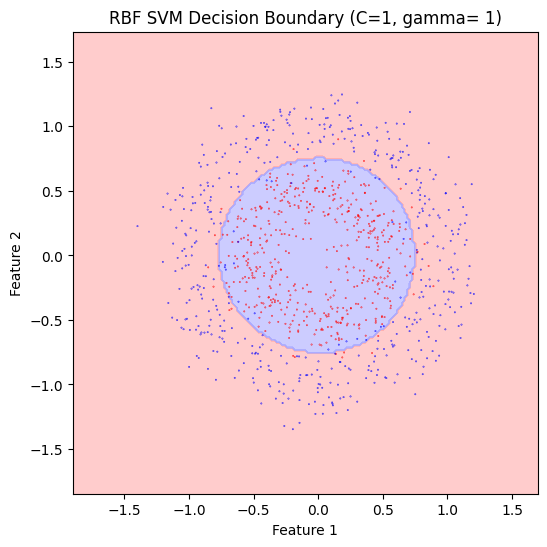

In [ ]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.15, random_state=42)

# RBF SVM
C= 1
gamma= 1
rbf_svm = SVC(kernel='rbf', C=C, gamma= gamma).fit(X, y)
plot_decision_boundary(rbf_svm, X, y, f"RBF SVM Decision Boundary (C={C}, gamma= {gamma})")

So, here clearly trees are not doing a great job for a curved dataset, while KNN works fine and same for SVM.

Let us try another dataset

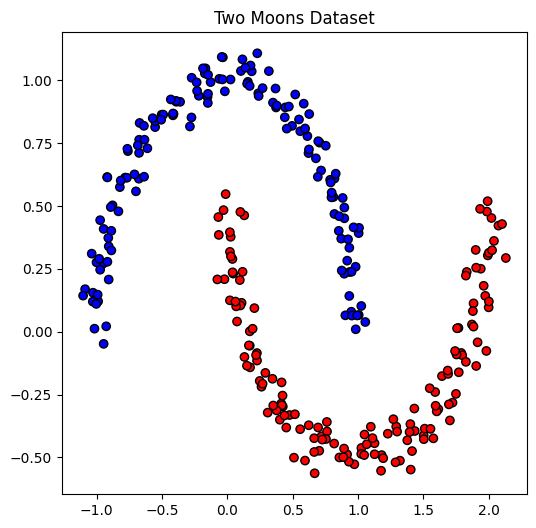

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap="bwr", edgecolors="k")
plt.title("Two Moons Dataset")
plt.show()


# Exploring KNN and Decision Trees on Two Moons

We are training KNN and Decision Trees on the curved “two moons” dataset.

For KNN, play with `n_neighbors` → fewer neighbors = jagged boundaries, more neighbors = smoother boundaries.

For Decision Trees, play with `max_depth` → shallow trees = simple boundaries, deep trees = more complex boundaries.

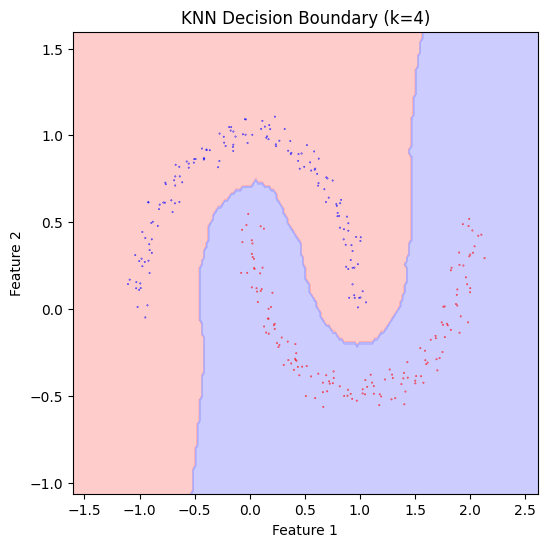

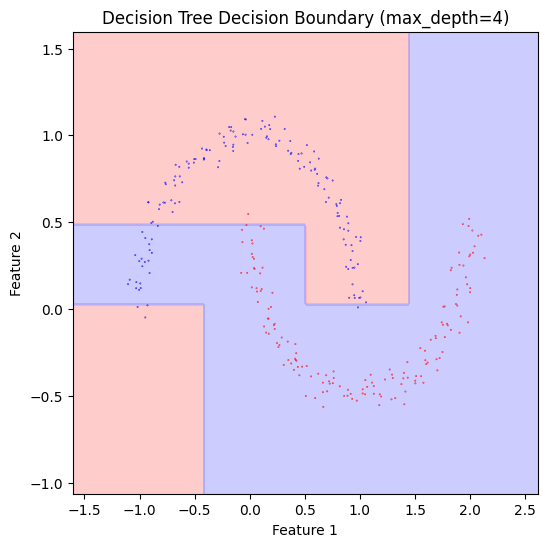

In [ ]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)


# Train KNN
n_neighbors=4
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)
plot_decision_boundary(knn, X, y, f"KNN Decision Boundary (k={n_neighbors})")

# Train Decision Tree
max_depth= 4
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
tree.fit(X, y)
plot_decision_boundary(tree, X, y, f"Decision Tree Decision Boundary (max_depth={max_depth})")

Now let us try the SVM method

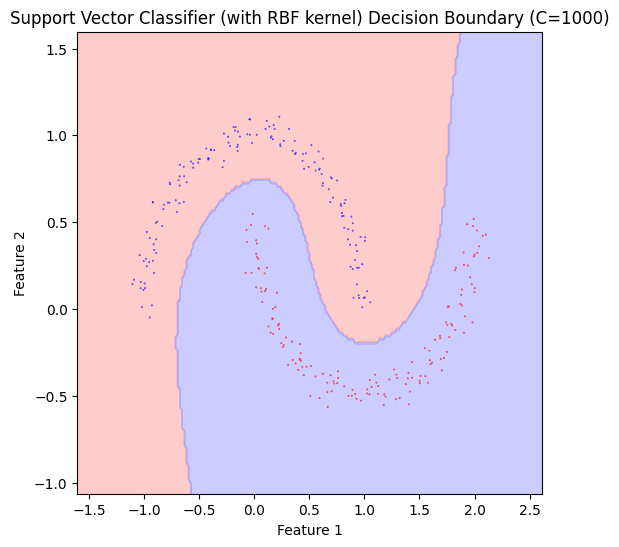

In [ ]:
# Fit RBF kernel SVM
from sklearn.svm import SVC

C=1000
rbf_svm = SVC(kernel='rbf', C=C, gamma='scale')
rbf_svm.fit(X, y)
plot_decision_boundary(rbf_svm, X, y, f"Support Vector Classifier (with RBF kernel) Decision Boundary (C={C})")


Let us compare SVMs and KNN for noisy data

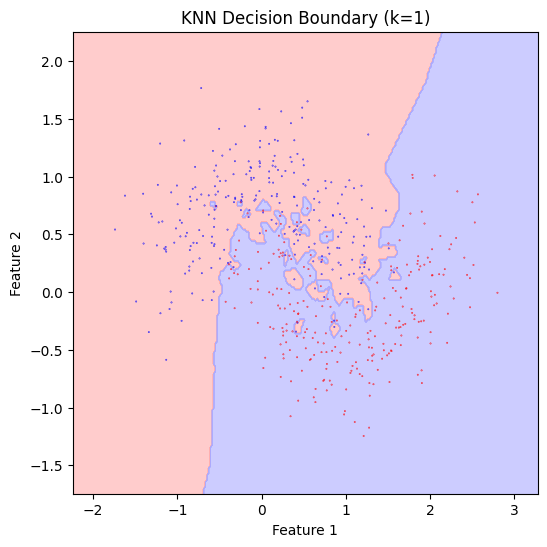

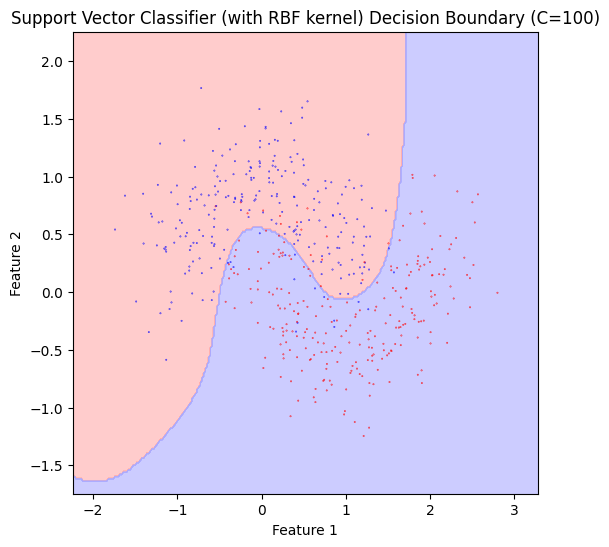

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)


# Train KNN
n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X, y)
plot_decision_boundary(knn, X, y, f"KNN Decision Boundary (k={n_neighbors})")

C=100
rbf_svm = SVC(kernel='rbf', C=C, gamma='scale')
rbf_svm.fit(X, y)
plot_decision_boundary(rbf_svm, X, y, f"Support Vector Classifier (with RBF kernel) Decision Boundary (C={C})")


# Images (MNIST)

Images are high-dimensional data:
Each digit = 784 features (28x28 pixels).

KNN compares raw pixel similarity.

SVM with RBF kernel can learn smoother nonlinear boundaries.

Scaling is important: SVMs need features normalized (e.g., [0,1]).

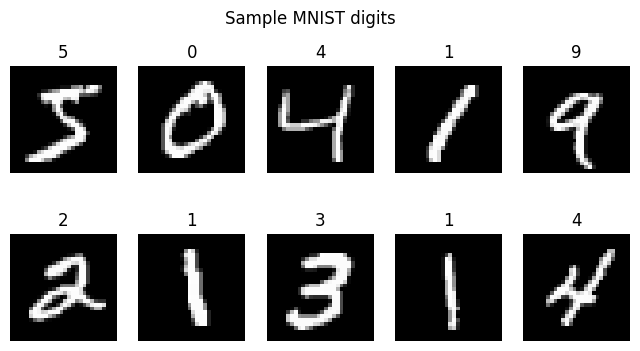

---------------------------------------
KNN accuracy: 0.895
SVM RBF accuracy: 0.925


In [ ]:
# Load MNIST (small subset for speed)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data[:2000], mnist.target[:2000].astype(int)

# Show some digits
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.title(y.iloc[i])
plt.suptitle("Sample MNIST digits")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("---------------------------------------")
# KNN
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("KNN accuracy:", accuracy_score(y_test, knn.predict(X_test)))

# Scale for SVM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVC(kernel="rbf", C=2, gamma=0.03).fit(X_train_scaled, y_train)
print("SVM RBF accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test_scaled)))


Note: the comparison above is not fair and perfect (you always need to optimize both algorithms)

# Text (20 Newsgroups)

👉 Text → very ***high-dimensional*** sparse TF-IDF vectors.

KNN struggles because distances in sparse space are noisy.

SVM with polynomial kernels works much better.

Shape of X: (18846, 2000) → high-dimensional feature space with 2000 features!


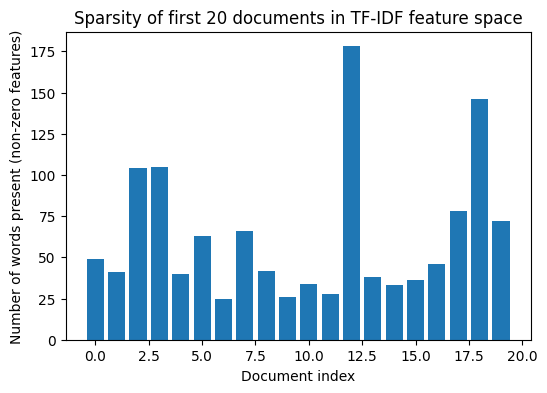

In [ ]:
# --- Load the 20 Newsgroups Text Dataset ---
# This is a dataset of text documents from 20 different newsgroups.
# Each document is labeled by its newsgroup.
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset="all")

# --- Convert text to numerical features using TF-IDF ---
# TF-IDF = Term Frequency-Inverse Document Frequency
# It transforms text into numbers that capture how important a word is in a document
# max_features=2000 limits to the 2000 most frequent terms for simplicity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
X = vectorizer.fit_transform(newsgroups.data)  # sparse matrix of shape (n_samples, n_features)
y = newsgroups.target  # labels for each document

print(f"Shape of X: {X.shape} → high-dimensional feature space with {X.shape[1]} features!")

# --- Visualize sparsity of the first few documents ---
import matplotlib.pyplot as plt
import numpy as np

# Take first 20 documents and count non-zero features
non_zero_counts = np.array((X[:20] > 0).sum(axis=1)).flatten()

plt.figure(figsize=(6,4))
plt.bar(range(20), non_zero_counts)
plt.xlabel("Document index")
plt.ylabel("Number of words present (non-zero features)")
plt.title("Sparsity of first 20 documents in TF-IDF feature space")
plt.show()

# --- Split into training and testing sets ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)




Try KNN and SVM on this dataset yourself (it will take some time)

In [ ]:

# KNN compares similarity between document vectors using distances
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred_knn)

print(f"RBF KNN accuracy: {acc:.2f}")


RBF KNN accuracy: 0.76


In [ ]:
# Polynomial kernel allows curved boundaries in high-dimensional space
svm_poly = SVC(kernel="poly", degree=3, coef0=1)
svm_poly.fit(X_train, y_train)
y_pred_svm = svm_poly.predict(X_test)

acc = accuracy_score(y_test, y_pred_svm)

print(f"RBF SVM accuracy: {acc:.2f}")


# Gene Expression (OpenML dataset)

👉 Bioinformatics datasets are high-dimensional, very few samples.
Perfect place where SVMs dominate KNN.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Load the dataset from OpenML
dataset_id = 40680
data = fetch_openml(data_id=dataset_id, as_frame=False)

X = data.data
y = data.target.astype(int)  # convert target to integer

# Convert to DataFrame for easier handling
X = pd.DataFrame(X)
y = pd.Series(y)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")

# High-dimensional data → RBF kernel may work, scaling helps
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

y_pred_svm = svm_rbf.predict(X_test_scaled)
print(f"SVM RBF Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")



KNN Accuracy: 0.85
SVM RBF Accuracy: 1.00


Always be skeptical of very high accuracies!

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# KNN metrics
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# SVM metrics
print("SVM RBF Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Optional: confusion matrix
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        65
           1       0.91      0.91      0.91       266

    accuracy                           0.85       331
   macro avg       0.77      0.77      0.77       331
weighted avg       0.85      0.85      0.85       331

SVM RBF Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       266

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331

SVM Confusion Matrix:
[[ 65   0]
 [  0 266]]


Stilll strange!

In [ ]:
from sklearn.model_selection import cross_val_score

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
scores = cross_val_score(svm_rbf, X_scaled, y, cv=5, scoring='accuracy')
print("SVM RBF cross-validated accuracy:", scores)
print("Mean accuracy:", scores.mean())


SVM RBF cross-validated accuracy: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


But what is an support vector machine? we look into this example from SK-Learn

library.
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

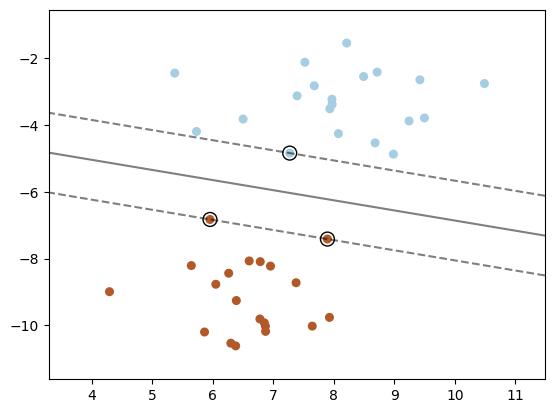

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

And how to control the complexity? What is the hyper-parameter?

Previos algorightms had their own complexity control:

*  KNN had number of neighbors
*  Trees have max-depth, and min_samples_split and min_samples_leaf

and for SVMs this is C. The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.

* Complex function (chance of over-fitting): For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly.
* Simple biased functions (Chance of under-fitting): A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py


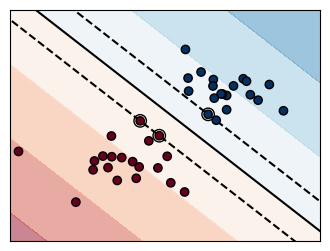

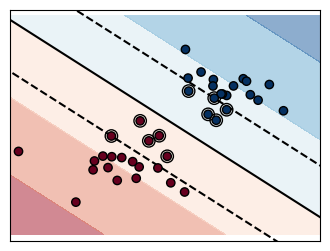

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# --- Create a small separable dataset ---
# 40 points in 2D, two classes (0 and 1)
# Shift one cluster left-down, one cluster right-up
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2],   # class 0
          np.random.randn(20, 2) + [2, 2]]   # class 1
Y = [0] * 20 + [1] * 20

# --- Iterate over two SVMs with different C values ---
# "unreg" (C=1) → allows some margin violations, small regularization
# "reg" (C=0.05) → strong regularization, larger margin, simpler decision boundary
fignum = 1
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    # Create linear SVM with given C (regularization)
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)  # train on the data

    # --- Compute the separating hyperplane ---
    # w = coefficients of the hyperplane
    w = clf.coef_[0]
    # slope of the line in 2D: -w0 / w1
    a = -w[0] / w[1]
    # create x-axis points for plotting
    xx = np.linspace(-5, 5)
    # compute corresponding y-axis points for the hyperplane
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # --- Compute the margin lines ---
    # distance from hyperplane to margin line = 1 / ||w||
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    # calculate upper and lower margin lines
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # --- Plot the hyperplane, margins, and points ---
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    # decision boundary
    plt.plot(xx, yy, "k-")
    # margins
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    # support vectors (highlighted as circles)
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    # all data points
    plt.scatter(
        X[:, 0], X[:, 1],
        c=Y,
        zorder=10,
        cmap=plt.get_cmap("RdBu"),
        edgecolors="k"
    )

    # --- Optional: contour plot of decision function ---
    # create grid of points
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    # compute distance to decision boundary
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot as background color map
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    # fix plot limits and remove ticks
    plt.axis("tight")
    plt.xlim(-4.8, 4.2)
    plt.ylim(-6, 6)
    plt.xticks(())
    plt.yticks(())

    fignum += 1  # next figure number

plt.show()
